# pipeline( ) function
- pipeline() combines preprocessing, passing the inputs thorugh the model (model forward pass/inference), postprocessing

In [2]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")
classifier(
    [
        "I've been waiting for a HuggingFace course my whole life.",
        "I hate this so much!",
    ]
)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


[{'label': 'POSITIVE', 'score': 0.9598046541213989},
 {'label': 'NEGATIVE', 'score': 0.9994558691978455}]

### Replicating the above pipeline( ) function by implementing details step by step

NOTES
- pipeline() combines preprocessing, passing the inputs thorugh the model (model forward pass/inference), postprocessing
- Tokenizer -> Model -> Post-processing (Raw text -> input IDs -> logits -> predictions)

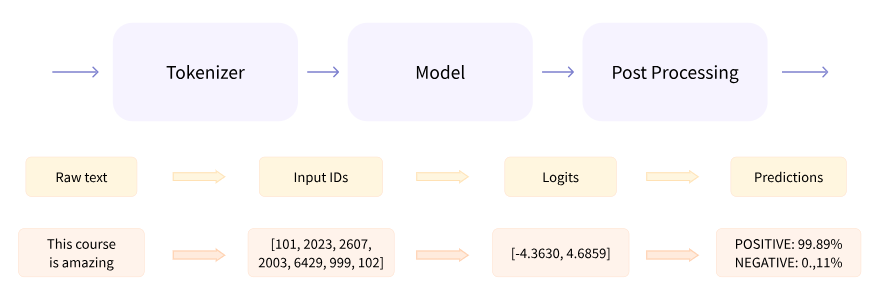

In [3]:
from transformers import AutoTokenizer

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [15]:
# returns list of lists if "return_tensors" type is not specified
raw_inputs = [
    "I've been waiting for a HuggingFace course my whole life.",
    "I hate this so much!",
]
inputs = tokenizer(raw_inputs, padding=True, truncation=True)
print(inputs["input_ids"])
print(inputs["attention_mask"])

[[101, 1045, 1005, 2310, 2042, 3403, 2005, 1037, 17662, 12172, 2607, 2026, 2878, 2166, 1012, 102], [101, 1045, 5223, 2023, 2061, 2172, 999, 102, 0, 0, 0, 0, 0, 0, 0, 0]]
[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]]


In [16]:
raw_inputs = [
    "I've been waiting for a HuggingFace course my whole life.",
    "I hate this so much!",
]
inputs = tokenizer(raw_inputs, padding=True, truncation=True, return_tensors="pt")
print(inputs)
print(inputs['input_ids'].shape)
print(inputs['attention_mask'].shape)

{'input_ids': tensor([[  101,  1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,
          2607,  2026,  2878,  2166,  1012,   102],
        [  101,  1045,  5223,  2023,  2061,  2172,   999,   102,     0,     0,
             0,     0,     0,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]])}
torch.Size([2, 16])
torch.Size([2, 16])


In [17]:
from transformers import AutoModel

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModel.from_pretrained(checkpoint)

In [25]:
outputs = model(**inputs)
print(type(outputs))
print(outputs.last_hidden_state.shape)

<class 'transformers.modeling_outputs.BaseModelOutput'>
torch.Size([2, 16, 768])


In [29]:
from transformers import AutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)
outputs = model(**inputs)
print(type(outputs))

<class 'transformers.modeling_outputs.SequenceClassifierOutput'>


In [33]:
print(outputs.logits)
print(outputs.logits.shape)

tensor([[-1.5607,  1.6123],
        [ 4.1692, -3.3464]], grad_fn=<AddmmBackward0>)
torch.Size([2, 2])


In [38]:
import torch 

predictions = torch.nn.functional.softmax(outputs.logits, dim=-1) # apply softmax across columns
print(predictions)

tensor([[4.0195e-02, 9.5980e-01],
        [9.9946e-01, 5.4418e-04]], grad_fn=<SoftmaxBackward0>)


In [40]:
model.config.id2label

{0: 'NEGATIVE', 1: 'POSITIVE'}

## Models

In [42]:
from transformers import BertConfig, BertModel

config = BertConfig()
model = BertModel(config)

In [43]:
print(config)

BertConfig {
  "_attn_implementation_autoset": true,
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.47.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}



In [44]:
from transformers import BertModel

model = BertModel.from_pretrained("bert-base-cased")

In [45]:
model

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(28996, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [47]:
model.save_pretrained("./bert-base-cased/")

Using a Transformer model for inference

In [50]:
sequences = ["Hello!", "Cool.", "Nice!"]

In [51]:
encoded_sequences = [
    [101, 7592, 999, 102],
    [101, 4658, 1012, 102],
    [101, 3835, 999, 102],
]

In [52]:
import torch 

model_inputs = torch.tensor(encoded_sequences)

In [53]:
output = model(model_inputs)

In [58]:
output.keys()

odict_keys(['last_hidden_state', 'pooler_output'])

## Tokenizers

- Bad sign: tokenizer producing lot of [UNK] or "unknown" tokens

In [61]:
# word-based: large vocabulary
tokenized_text = "Jim Henson was a puppeteer".split()
print(tokenized_text)

['Jim', 'Henson', 'was', 'a', 'puppeteer']


In [62]:
# character-based: small vocabulary, fewer "unknown" tokens; large amount of tokens, less meaning

In [65]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-cased")

In [67]:
from transformers import AutoTokenizer # use AutoTokenizer for simple loading

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

In [68]:
tokenizer("Using a Transformer network is simple")

{'input_ids': [101, 7993, 170, 13809, 23763, 2443, 1110, 3014, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [69]:
tokenizer.save_pretrained("ch2_tokenizer")

('ch2_tokenizer\\tokenizer_config.json',
 'ch2_tokenizer\\special_tokens_map.json',
 'ch2_tokenizer\\vocab.txt',
 'ch2_tokenizer\\added_tokens.json',
 'ch2_tokenizer\\tokenizer.json')

In [79]:
# Tokenizer: Tokenize + convert to input IDs

from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

sequence = "Using a Transformer network is simple"
tokens = tokenizer.tokenize(sequence)

print(tokens)

['Using', 'a', 'Trans', '##former', 'network', 'is', 'simple']


In [80]:
ids = tokenizer.convert_tokens_to_ids(tokens)

print(ids)

[7993, 170, 13809, 23763, 2443, 1110, 3014]


In [81]:
decoded_string = tokenizer.decode([7993, 170, 11303, 1200, 2443, 1110, 3014])
print(decoded_string)

Using a transformer network is simple


In [82]:
tokenizer.decode([7993, 170, 13809, 23763, 2443, 1110, 3014])

'Using a Transformer network is simple'

In [83]:
tokenizer.decode([13809, 23763]), tokenizer.decode([11303, 1200])

('Transformer', 'transformer')

## Handling multiple sequences 

In [20]:
import torch 
from transformers import AutoTokenizer, AutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

sequence = "I've been waiting for a HuggingFace course my whole life."

tokens = tokenizer.tokenize(sequence)
ids = tokenizer.convert_tokens_to_ids(tokens)
# len(tokens),len(ids)
input_ids = torch.tensor(ids)
print(input_ids)
print(input_ids.shape) #torch.Size([14])
input_ids.dtype, input_ids.type, type(input_ids)
# model(input_ids) # give to an dimension error


tensor([ 1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,  2607,
         2026,  2878,  2166,  1012])
torch.Size([14])


(torch.int64, <function Tensor.type>, torch.Tensor)

In [23]:
tokenizer.convert_ids_to_tokens([101, 102])

['[CLS]', '[SEP]']

In [19]:
tokenized_inputs = tokenizer(sequence, return_tensors="pt")
print(tokenized_inputs["input_ids"])
print(tokenized_inputs["input_ids"].shape)
print(tokenized_inputs)

tensor([[  101,  1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,
          2607,  2026,  2878,  2166,  1012,   102]])
torch.Size([1, 16])
{'input_ids': tensor([[  101,  1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,
          2607,  2026,  2878,  2166,  1012,   102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}


In [24]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

sequence = "I've been waiting for a HuggingFace course my whole life."

tokens = tokenizer.tokenize(sequence)
ids = tokenizer.convert_tokens_to_ids(tokens)

input_ids = torch.tensor([ids])
print("Input IDs:", input_ids)
print(input_ids.shape)

output = model(input_ids)
print("Logits:", output.logits)

Input IDs: tensor([[ 1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,  2607,
          2026,  2878,  2166,  1012]])
torch.Size([1, 14])
Logits: tensor([[-2.7276,  2.8789]], grad_fn=<AddmmBackward0>)


In [32]:
batched_ids = [ids, ids]
print(len(batched_ids),len(batched_ids[0]))
input_ids = torch.tensor(batched_ids)
print(input_ids.shape)

2 14
torch.Size([2, 14])


In [35]:
outputs = model(input_ids)
print(f'logits:{outputs.logits}')

logits:tensor([[-2.7276,  2.8789],
        [-2.7276,  2.8789]], grad_fn=<AddmmBackward0>)


#### padding

In [42]:
batched_ids = [[200, 200, 200],
    [200, 200]]
padding_id = 100
batched_ids = [[200, 200, 200],
    [200, 200, padding_id]]

In [41]:
tokenizer.pad_token_type_id

0

In [47]:
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

sequence1_ids = [[200, 200, 200]]
sequence2_ids = [[200, 200]]
batched_ids = [
    [200, 200, 200],
    [200, 200, tokenizer.pad_token_id],
]

print(model(torch.tensor(sequence1_ids)).logits)
print(model(torch.tensor(sequence2_ids)).logits)
print(model(torch.tensor(batched_ids)).logits)

tensor([[ 1.5694, -1.3895]], grad_fn=<AddmmBackward0>)
tensor([[ 0.5803, -0.4125]], grad_fn=<AddmmBackward0>)
tensor([[ 1.5694, -1.3895],
        [ 1.3374, -1.2163]], grad_fn=<AddmmBackward0>)


#### attention masks

In [48]:
batched_ids = [
    [200, 200, 200],
    [200, 200, tokenizer.pad_token_id],
]

attention_mask = [
    [1, 1, 1],
    [1, 1, 0],
]

outputs = model(torch.tensor(batched_ids), attention_mask=torch.tensor(attention_mask))
print(outputs.logits)

tensor([[ 1.5694, -1.3895],
        [ 0.5803, -0.4125]], grad_fn=<AddmmBackward0>)


#### try it out

In [66]:
import torch 
from transformers import AutoTokenizer, AutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

sequence1 = "I've been waiting for a HuggingFace course my whole life."
sequence2 = "I hate this so much!"

sequence = sequence1
tokens = tokenizer.tokenize(sequence)
ids = tokenizer.convert_tokens_to_ids(tokens)
print(len(tokens),len(ids))

input_ids = torch.tensor([ids])
# print(input_ids),print(input_ids.shape) #torch.Size([14])

output = model(input_ids)
print("Logits1:", output.logits)

sequence = sequence2
tokens = tokenizer.tokenize(sequence)
ids = tokenizer.convert_tokens_to_ids(tokens)
# print(len(tokens),len(ids))

input_ids = torch.tensor([ids])
# print(input_ids),print(input_ids.shape) #torch.Size([14])

output = model(input_ids)
print("Logits2:", output.logits)


14 14
Logits1: tensor([[-2.7276,  2.8789]], grad_fn=<AddmmBackward0>)
Logits2: tensor([[ 3.1931, -2.6685]], grad_fn=<AddmmBackward0>)


In [67]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

sequence1 = "I've been waiting for a HuggingFace course my whole life."
sequence2 = "I hate this so much!"

tokens1 = tokenizer.tokenize(sequence1)
ids1 = tokenizer.convert_tokens_to_ids(tokens1)
tokens2 = tokenizer.tokenize(sequence2)
ids2 = tokenizer.convert_tokens_to_ids(tokens2)

# print(tokenizer.pad_token_id)

# padding
batched_ids = [ids1, ids2 + [tokenizer.pad_token_id]*(len(ids1)-len(ids2))]
# print(len(batched_ids[0]))
# print(len(batched_ids[1]))

# attention mask
attention_mask = [[1]*len(ids1), [1]*len(ids2) + [0]*(len(ids1)-len(ids2))]
# print(attention_mask)

input_ids = torch.tensor(batched_ids)
# print("Input IDs:", input_ids)
# print(input_ids.shape)

output = model(input_ids, attention_mask=torch.tensor(attention_mask)) # [[-2.7276,  2.8789]], [[ 3.1931, -2.6685]]
print("Logits:", output.logits)

Logits: tensor([[-2.7276,  2.8789],
        [ 3.1931, -2.6685]], grad_fn=<AddmmBackward0>)


## Putting it all together

In [2]:
from transformers import AutoTokenizer

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

sequence = "I've been waiting for a HuggingFace course my whole life."

model_inputs = tokenizer(sequence)
model_inputs

{'input_ids': [101, 1045, 1005, 2310, 2042, 3403, 2005, 1037, 17662, 12172, 2607, 2026, 2878, 2166, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [4]:
sequence = "I've been waiting for a HuggingFace course my whole life."

model_inputs = tokenizer(sequence)
model_inputs

{'input_ids': [101, 1045, 1005, 2310, 2042, 3403, 2005, 1037, 17662, 12172, 2607, 2026, 2878, 2166, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [3]:
sequences = ["I've been waiting for a HuggingFace course my whole life.", "So have I!"]

model_inputs = tokenizer(sequences)
len(model_inputs['input_ids'][0]), len(model_inputs['input_ids'][1])

(16, 6)

In [5]:
# Will pad the sequences up to the maximum sequence length
model_inputs = tokenizer(sequences, padding="longest")
print(len(model_inputs['input_ids'][0]), len(model_inputs['input_ids'][1]))

# Will pad the sequences up to the model max length
# (512 for BERT or DistilBERT)
model_inputs = tokenizer(sequences, padding="max_length")
# print(model_inputs)
print(len(model_inputs['input_ids'][0]), len(model_inputs['input_ids'][1]))

# Will pad the sequences up to the specified max length
model_inputs = tokenizer(sequences, padding="max_length", max_length=8)
# print(model_inputs)
print(len(model_inputs['input_ids'][0]), len(model_inputs['input_ids'][1]))

16 16
512 512
16 8


In [6]:
sequences = ["I've been waiting for a HuggingFace course my whole life.", "So have I!"]

# Will truncate the sequences that are longer than the model max length
# (512 for BERT or DistilBERT)
model_inputs = tokenizer(sequences, truncation=True)
print(len(model_inputs['input_ids'][0]), len(model_inputs['input_ids'][1]))

# Will truncate the sequences that are longer than the specified max length
model_inputs = tokenizer(sequences, max_length=8, truncation=True)
print(len(model_inputs['input_ids'][0]), len(model_inputs['input_ids'][1]))

16 6
8 6


In [8]:
import tensorflow as tf
import numpy as np

sequences = ["I've been waiting for a HuggingFace course my whole life.", "So have I!"]

# Returns PyTorch tensors
model_inputs = tokenizer(sequences, padding=True, return_tensors="pt")
print(model_inputs['input_ids'].dtype)
print(model_inputs['input_ids'].type())

# # Returns TensorFlow tensors
model_inputs = tokenizer(sequences, padding=True, return_tensors="tf")
print(model_inputs['input_ids'].dtype)

# # Returns NumPy arrays
model_inputs = tokenizer(sequences, padding=True, return_tensors="np")
print(model_inputs['input_ids'].dtype)


torch.int64
torch.LongTensor
<dtype: 'int32'>
int32


In [9]:
sequence = "I've been waiting for a HuggingFace course my whole life."

model_inputs = tokenizer(sequence)
print(model_inputs["input_ids"])

tokens = tokenizer.tokenize(sequence)
ids = tokenizer.convert_tokens_to_ids(tokens)
print(ids)

[101, 1045, 1005, 2310, 2042, 3403, 2005, 1037, 17662, 12172, 2607, 2026, 2878, 2166, 1012, 102]
[1045, 1005, 2310, 2042, 3403, 2005, 1037, 17662, 12172, 2607, 2026, 2878, 2166, 1012]


In [10]:
print(tokenizer.decode(model_inputs["input_ids"]))
print(tokenizer.decode(ids))

[CLS] i've been waiting for a huggingface course my whole life. [SEP]
i've been waiting for a huggingface course my whole life.


In [11]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)
sequences = ["I've been waiting for a HuggingFace course my whole life.", "So have I!"]

tokens = tokenizer(sequences, padding=True, truncation=True, return_tensors="pt")
output = model(**tokens)

In [12]:
output

SequenceClassifierOutput(loss=None, logits=tensor([[-1.5607,  1.6123],
        [-3.6183,  3.9137]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)